In [42]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 人工生成图

### ER graph, BA graph, WS graph
ref.[Graph generators](https://networkx.github.io/documentation/stable/reference/generators.html)

In [2]:
G1 = nx.erdos_renyi_graph(20, 0.5) #
G2 = nx.fast_gnp_random_graph(20, 0.5)
G3 = nx.barabasi_albert_graph(20, 2)
G4 = nx.watts_strogatz_graph(20, 2, 0.4)

D:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


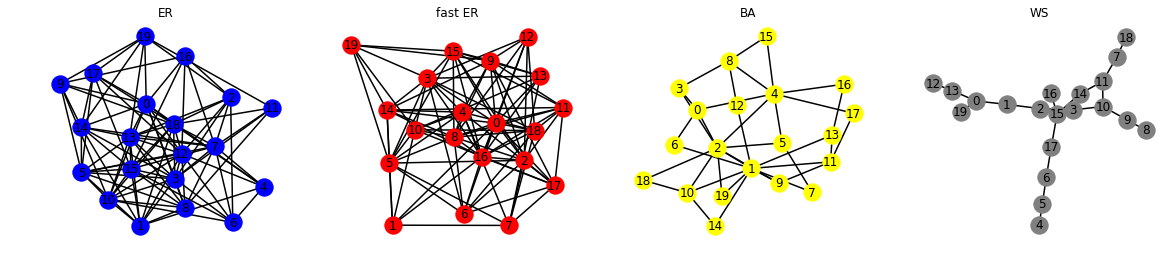

In [13]:
plt.figure(figsize=(20, 4))
plt.subplot(141)
nx.draw(G1,with_labels=True, node_color = 'blue', width=1.5)
plt.title('ER')
plt.subplot(142)
nx.draw(G2,with_labels=True, node_color = 'red', width=1.5)
plt.title('fast ER')
plt.subplot(143)
nx.draw(G3,with_labels=True, node_color = 'yellow', width=1.5)
plt.title('BA')
plt.subplot(144)
nx.draw(G4,with_labels=True, node_color = 'grey', width=1.5)
plt.title('WS')
plt.show()

###  配置模型 configuration_model, 随机块模型 stochastic_block_model

In [23]:
sequence = nx.random_powerlaw_tree_sequence(40, tries=5000)
G5 = nx.configuration_model(sequence)

In [24]:
sizes = [20, 20]
probs = [[0.7, 0.05],
         [0.05, 0.7]]
G6 = nx.stochastic_block_model(sizes, probs, seed=0)

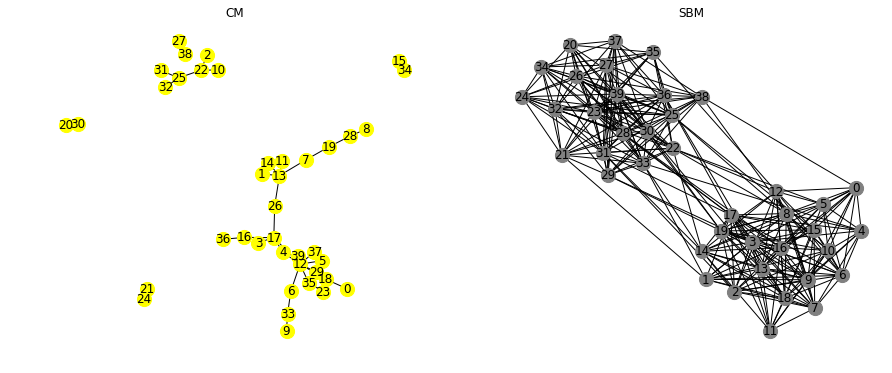

In [29]:
plt.figure(figsize=(15, 6))
plt.subplot(121)
nx.draw(G5,with_labels=True,node_size=200, node_color = 'yellow', width=1)
plt.title('CM')
plt.subplot(122)
nx.draw(G6, with_labels=True,node_size=200, node_color = 'grey', width=1)
plt.title('SBM')
plt.show()

## 真实网络
ref.[Reading and writing graphs](https://networkx.github.io/documentation/stable/reference/readwrite/index.html)

In [33]:
G = nx.read_weighted_edgelist("graphdata/USAir.txt",nodetype=str) #建议用nodetype=str,用int也行 
# nx.read_edgelist 我们实验的数据基本为边列表

In [34]:
G.nodes

NodeView(('118', '201', '258', '182', '152', '162', '47', '144', '263', '301', '221', '321', '203', '65', '306', '297', '253', '183', '307', '169', '216', '212', '274', '92', '68', '91', '125', '189', '305', '202', '222', '80', '273', '250', '126', '204', '127', '186', '148', '129', '76', '78', '163', '70', '114', '77', '261', '248', '150', '311', '146', '147', '112', '313', '67', '219', '299', '293', '177', '310', '232', '296', '123', '172', '292', '167', '197', '246', '94', '276', '225', '284', '133', '239', '218', '128', '251', '254', '275', '198', '308', '240', '213', '286', '271', '281', '267', '242', '309', '206', '81', '220', '290', '266', '226', '270', '142', '241', '278', '279', '291', '247', '304', '184', '280', '153', '257', '269', '168', '255', '166', '109', '230', '179', '174', '176', '131', '217', '119', '288', '161', '159', '95', '256', '260', '157', '237', '322', '249', '298', '287', '283', '192', '300', '137', '234', '223', '132', '295', '215', '272', '265', '289', '31

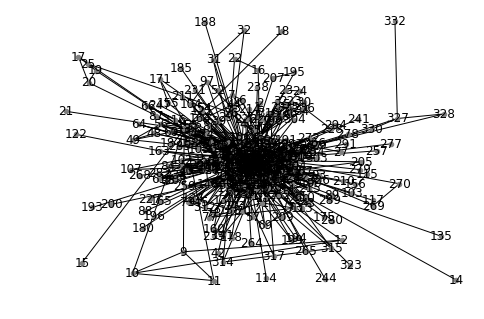

In [50]:
nx.draw(G,with_labels=True,node_size=20, node_color = 'grey', width=1)
plt.show()

### 邻接矩阵

In [41]:
nx.adj_matrix(G).toarray() #nx.adj_matrix对应的是稀疏矩阵 nx.to_scipy_sparse_matrix

array([[0.    , 0.1804, 0.1474, ..., 0.    , 0.    , 0.    ],
       [0.1804, 0.    , 0.0662, ..., 0.    , 0.    , 0.    ],
       [0.1474, 0.0662, 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]])

> [Converting to and from other data formats](https://networkx.github.io/documentation/stable/reference/convert.html) 提供了一些其他的函数来得到邻接矩阵,边列表
* **nx.to_numpy_array**,  nx.from_numpy_array 
* *nx.to_numpy_matrix*, nx.from_numpy_matrix
* **nx.to_scipy_sparse_matrix**, nx.from_scipy_sparse_matrix
* **nx.to_pandas_adjacency**, nx.from_pandas_adjacency
* **nx.to_pandas_edgelist**, nx.from_pandas_edgelist

In [38]:
nx.to_numpy_array(G)

array([[0.    , 0.1804, 0.1474, ..., 0.    , 0.    , 0.    ],
       [0.1804, 0.    , 0.0662, ..., 0.    , 0.    , 0.    ],
       [0.1474, 0.0662, 0.    , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]])

In [39]:
nx.to_numpy_matrix(G)

matrix([[0.    , 0.1804, 0.1474, ..., 0.    , 0.    , 0.    ],
        [0.1804, 0.    , 0.0662, ..., 0.    , 0.    , 0.    ],
        [0.1474, 0.0662, 0.    , ..., 0.    , 0.    , 0.    ],
        ...,
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]])

In [44]:
df = nx.to_pandas_adjacency(G)
df.head()

,118,201,258,182,152,162,47,144,263,301,...,194,165,195,38,37,25,320,207,34,11
118,0.0000,0.1804,0.1474,0.0332,0.0416,0.0676,0.1828,0.1231,0.1733,0.1366,...,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
201,0.1804,0.0000,0.0662,0.1634,0.2163,0.2410,0.0938,0.0609,0.0536,0.0000,...,0.0,0.021,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
258,0.1474,0.0662,0.0000,0.1214,0.1754,0.1971,0.1437,0.0702,0.0271,0.0000,...,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0
182,0.0332,0.1634,0.1214,0.0000,0.0542,0.0777,0.1826,0.1118,0.1482,0.1105,...,0.0,0.000,0.0118,0.0,0.0,0.0,0.0,0.0151,0.0,0.0
152,0.0416,0.2163,0.1754,0.0542,0.0000,0.0261,0.2244,0.0000,0.2023,0.1202,...,0.0,0.000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0


In [47]:
df1 = nx.to_pandas_edgelist(G)
df1.head()

,source,target,weight
0,118,201,0.1804
1,118,258,0.1474
2,118,182,0.0332
3,118,152,0.0416
4,118,162,0.0676


### node与array的对应，当需要用矩阵处理（numpy）的时候有用

In [57]:
node2array = list(zip(G.nodes, range(G.order())))
node2array[:6]

[('118', 0), ('201', 1), ('258', 2), ('182', 3), ('152', 4), ('162', 5)]

In [60]:
array2node = list(enumerate(G.nodes))
array2node[:6]

[(0, '118'), (1, '201'), (2, '258'), (3, '182'), (4, '152'), (5, '162')]

## 图算法与矩阵计算，需要的时候查参考文献就行
ref.
1. [Graph Algorithms](https://networkx.github.io/documentation/stable/reference/algorithms/index.html)
2. [Linear algebra](https://networkx.github.io/documentation/stable/reference/linalg.html)